## Import Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# For timeseries RNN LSTM neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

2023-04-29 22:19:04.153100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

## Dataset American Airlines Inc (AAL: Jan 22, 2009 - Jan 22, 2012)

In [5]:
pwd

'/Users/udaykumar/Desktop'

In [6]:
cd /Users/udaykumar/Downloads

/Users/udaykumar/Downloads


## Load Dataset

In [7]:
df_ALL=pd.read_csv('AAL.csv')

In [8]:
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-23,7.10,8.00,7.03,7.82,7.372238,5693700
1,2009-01-26,7.79,8.02,7.52,7.70,7.259109,3242800
2,2009-01-27,7.73,7.80,6.26,6.71,6.325797,8829700
3,2009-01-28,7.04,7.46,6.92,7.30,6.882013,6342100
4,2009-01-29,7.15,7.75,6.33,6.47,6.099537,9766200


## Brief Exploratory Data Analysis (EDA) 

In [9]:
df_ALL.shape

(755, 7)

In [10]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
# Statistics Sumary
df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,6.618040,6.794053,6.422146,6.596026,6.218348,8.517628e+06
std,2.701919,2.729561,2.675576,2.699536,2.544964,5.097315e+06
min,2.000000,2.090000,1.880000,1.970000,1.857201,1.899200e+06
25%,4.415000,4.555000,4.315000,4.410000,4.157490,5.303200e+06
50%,6.280000,6.450000,6.060000,6.260000,5.901561,7.126600e+06
75%,9.040000,9.210000,8.845000,9.030000,8.512956,1.003475e+07
max,12.240000,12.260000,11.870000,12.070000,11.378889,5.235450e+07


## Keep only "Close" (for closing price) and filter out all other attributes.

#### Notes: The research focuses only on the closing price

In [12]:
df = df_ALL.iloc[:,4:5]

In [13]:
df.head()

,Close
0,7.82
1,7.70
2,6.71
3,7.30
4,6.47


<AxesSubplot:>

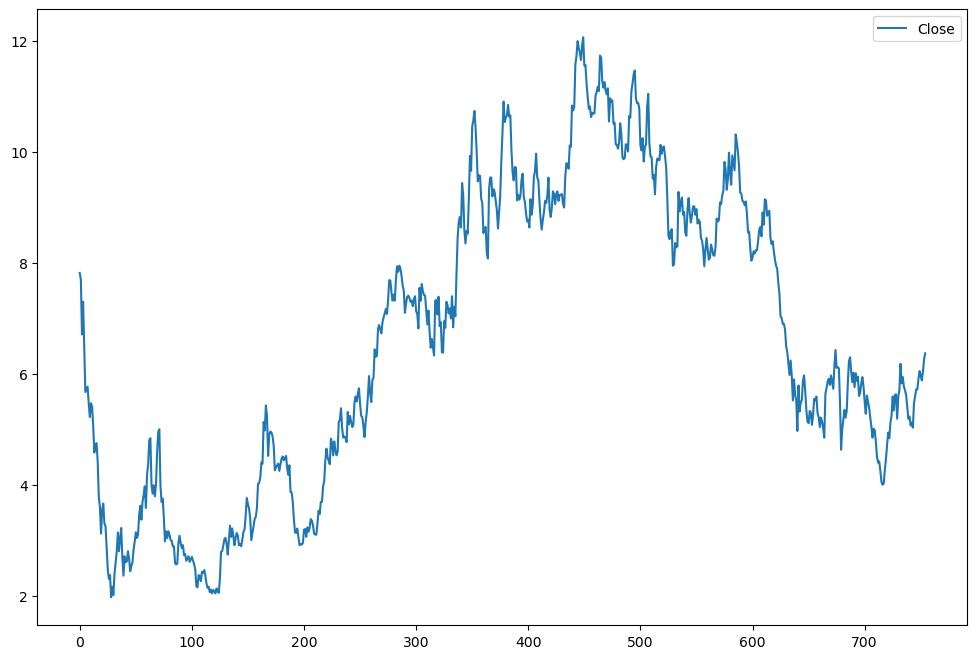

In [14]:
df.plot(figsize=(12, 8))

## Length of Input Time Series-Number of Input Time Steps

In [15]:
length60 = 60

In [16]:
length60

60

## Time Series Dataset: Train / Test 

In [17]:
len(df)

755

In [18]:
test_precent = 0.1

In [19]:
len(df)*test_precent

75.5

## Split Data --> Train / Test 

In [20]:
test_length = np.round(len(df)*test_precent)
test_length

76.0

In [21]:
split_index = int(len(df) - test_length)
split_index

679

In [22]:
data_train = df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [23]:
data_train.head(5)

,Close
0,7.82
1,7.70
2,6.71
3,7.30
4,6.47


In [24]:
data_train.tail()

,Close
674,6.43
675,6.11
676,6.12
677,6.10
678,5.50


In [25]:
data_test.head(5)

,Close
619,8.21
620,8.06
621,7.95
622,7.90
623,7.64


In [26]:
data_test.tail()

,Close
750,5.97
751,5.88
752,6.04
753,6.26
754,6.37


## Normalize Data Scale it into the[0, 1]

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(data_train)

MinMaxScaler()

In [29]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

## Create Timeseries Generator for training

In [30]:
batch_size32 = 32
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [31]:
len(normalized_train)

679

In [32]:
len(train_tsGenerator60)

20

In [33]:
x,y = train_tsGenerator60[0]

In [34]:
# print(x)

In [35]:
# print(y)

## Build, Train, and Test Model 

### Build LSTM Model

In [36]:
n_features = 1

In [37]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

2023-04-29 22:19:18.459237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Complie Model

In [38]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

In [39]:
model.fit_generator(train_tsGenerator60, epochs=100)

/var/folders/jp/xnmsl60d1bsf55jdzg5kjf5h0000gn/T/ipykernel_4934/1152258115.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator60, epochs=100)


Epoch 1/100
20/20 [==============================] - 13s 119ms/step - loss: 0.2138
Epoch 2/100
20/20 [==============================] - 3s 147ms/step - loss: 0.0208
Epoch 3/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0247
Epoch 4/100
20/20 [==============================] - 3s 160ms/step - loss: 0.0199
Epoch 5/100
20/20 [==============================] - 3s 141ms/step - loss: 0.0120
Epoch 6/100
20/20 [==============================] - 2s 123ms/step - loss: 0.0100
Epoch 7/100
20/20 [==============================] - 2s 124ms/step - loss: 0.0075
Epoch 8/100
20/20 [==============================] - 2s 114ms/step - loss: 0.0084
Epoch 9/100
20/20 [==============================] - 2s 105ms/step - loss: 0.0073
Epoch 10/100
20/20 [==============================] - 2s 118ms/step - loss: 0.0096
Epoch 11/100
20/20 [==============================] - 2s 114ms/step - loss: 0.0077
Epoch 12/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0072
Epoch 13/100

20/20 [==============================] - 2s 91ms/step - loss: 0.0030


### Visualize Model Performance After Training.

In [40]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

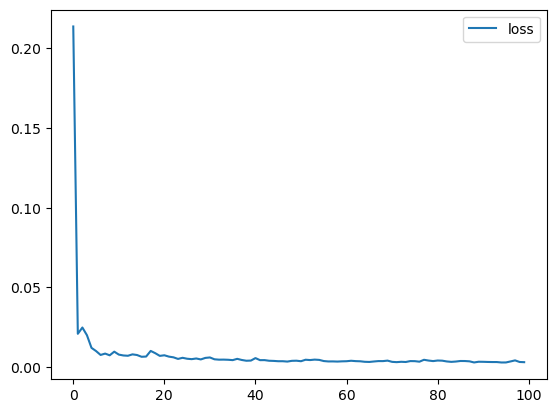

In [41]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

## Prediciton for Testing: Using Timeseries Generator

### Create Timeseries Generator for Testing

In [42]:
batch_size1 = 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

### Predict future data points for testing.

In [43]:
normalized_prediction = model.predict_generator (test_tsGenerator60) 

/var/folders/jp/xnmsl60d1bsf55jdzg5kjf5h0000gn/T/ipykernel_4934/880395577.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  normalized_prediction = model.predict_generator (test_tsGenerator60)


In [44]:
normalized_prediction

array([[0.396545  ],
       [0.3739382 ],
       [0.34629685],
       [0.3207094 ],
       [0.30226022],
       [0.29054755],
       [0.28599697],
       [0.29244602],
       [0.31006426],
       [0.33505386],
       [0.36028773],
       [0.38011461],
       [0.39418417],
       [0.39975214],
       [0.40096658],
       [0.39815873],
       [0.39374977],
       [0.38518715],
       [0.37476414],
       [0.36629212],
       [0.3620038 ],
       [0.35975313],
       [0.3558842 ],
       [0.34828734],
       [0.34194028],
       [0.3369463 ],
       [0.3324868 ],
       [0.32691932],
       [0.3192435 ],
       [0.30877286],
       [0.29870707],
       [0.2902398 ],
       [0.28217214],
       [0.27238274],
       [0.26093778],
       [0.24945638],
       [0.23775904],
       [0.22494146],
       [0.21161446],
       [0.1991392 ],
       [0.19092761],
       [0.18972707],
       [0.19766293],
       [0.21381825],
       [0.23328388],
       [0.25480783],
       [0.27664903],
       [0.299

In [45]:
len(normalized_prediction)

76

In [46]:
# convert normalized predictions back to the true values
prediction = scaler.inverse_transform(normalized_prediction)

In [47]:
prediction_index = np.arange(679, 755, step=1)

df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

In [48]:
df_prediction

,Prediction
679,5.975105
680,5.746776
681,5.467598
682,5.209165
683,5.022828
...,...
750,5.588320
751,5.762985
752,5.885369
753,5.967751


## Visuavilize Prediction

<AxesSubplot:>

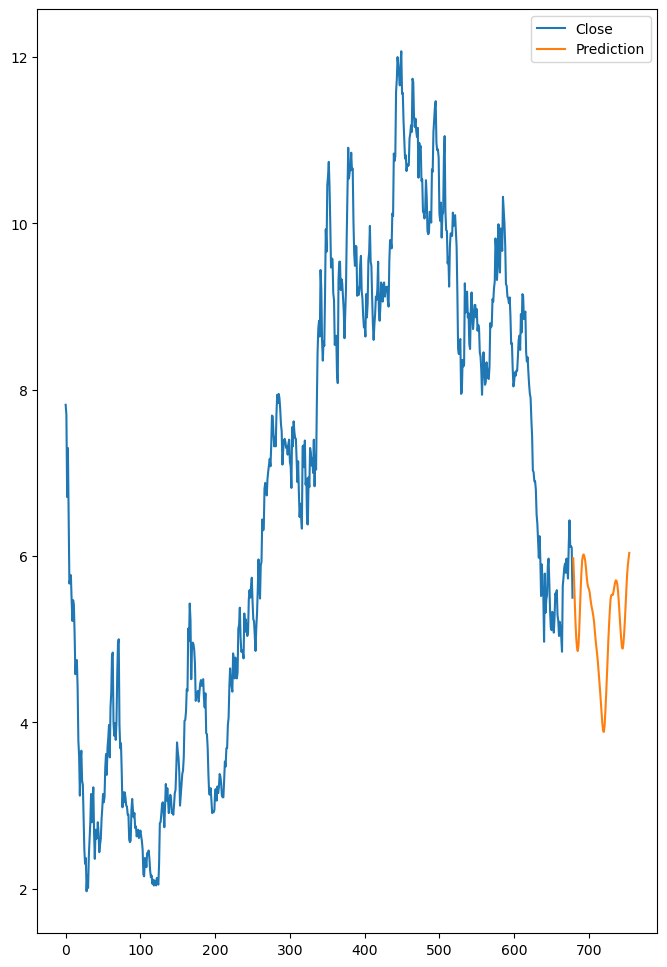

In [49]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

## Visuavilize Prediciton and Compare Actual Close Price

<AxesSubplot:>

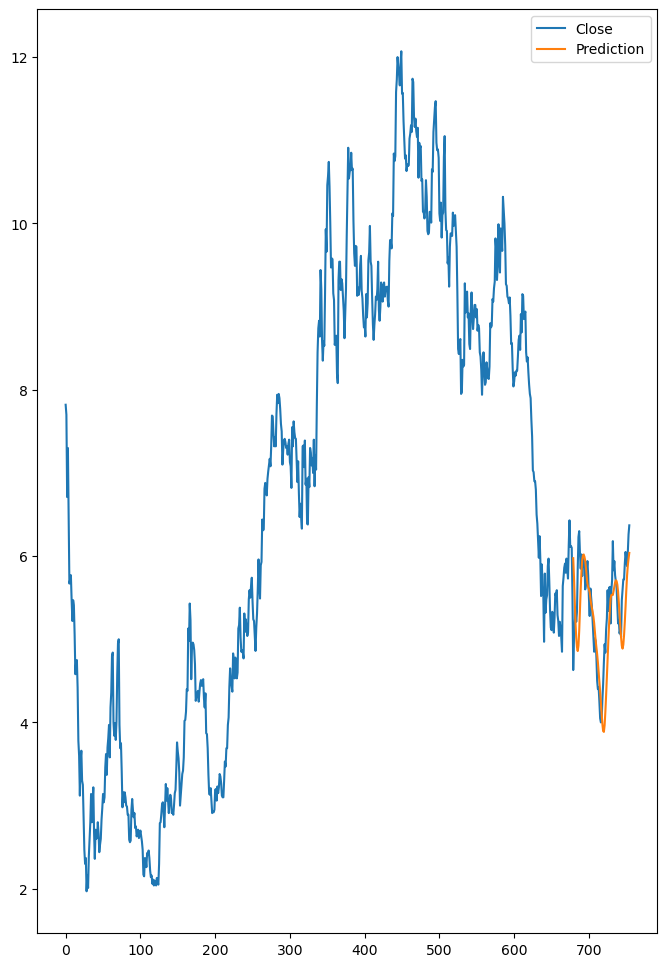

In [50]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

## Timeseries Forecasting With LSTM

## Overview

### Timeseries Forecasting:

### Forecast into the "Future" or unknown range.

### Should employ all the available data.

### i.e., not split the data into training/testing

### Preprocess full input dataset

In [51]:
#Still use Minmax Scaler to normalize the full input dataset

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

## Create Timeseries Generator for Forecasting.

In [52]:
# Number of time steps of the input time series
# still use length60:
length60

60

In [53]:
# create timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)

# Build, Compile and Fit LSTM Model for Forecasting

In [54]:
# Train/Fit LSTM model
# In forecasting, we don't valiate, only FORECAST
# So, not need EarlyStop: Not need validation_generator

model.fit_generator(forecast_tsGenerator, epochs = 100)

Epoch 1/100
 1/22 [>.............................] - ETA: 2s - loss: 0.0019

/var/folders/jp/xnmsl60d1bsf55jdzg5kjf5h0000gn/T/ipykernel_4934/1181600291.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(forecast_tsGenerator, epochs = 100)


22/22 [==============================] - 2s 86ms/step - loss: 0.0031
Epoch 2/100
22/22 [==============================] - 2s 78ms/step - loss: 0.0029
Epoch 3/100
22/22 [==============================] - 2s 96ms/step - loss: 0.0027
Epoch 4/100
22/22 [==============================] - 2s 108ms/step - loss: 0.0028
Epoch 5/100
22/22 [==============================] - 2s 107ms/step - loss: 0.0030
Epoch 6/100
22/22 [==============================] - 2s 107ms/step - loss: 0.0027
Epoch 7/100
22/22 [==============================] - 2s 101ms/step - loss: 0.0029
Epoch 8/100
22/22 [==============================] - 2s 78ms/step - loss: 0.0030
Epoch 9/100
22/22 [==============================] - 2s 96ms/step - loss: 0.0024
Epoch 10/100
22/22 [==============================] - 2s 89ms/step - loss: 0.0027
Epoch 11/100
22/22 [==============================] - 2s 73ms/step - loss: 0.0033
Epoch 12/100
22/22 [==============================] - 2s 73ms/step - loss: 0.0029
Epoch 13/100
22/22 [=============

## Timeseries Forecasting Using LSTM Neural Network 

In [55]:
forecast = []
# Set periods with the time span of forecasting
# Let's forecast for the next 102 business days 
periods = 102

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)
    

1/1 [==============================] - 0s 62ms/step


## Inverse to Transform Normalized Data Back Into True Values

In [56]:
forecast = full_scaler.inverse_transform(forecast)

forecast

array([[6.00636243],
       [5.9941751 ],
       [5.92173591],
       [5.8328511 ],
       [5.74704555],
       [5.66875756],
       [5.59883837],
       [5.53344627],
       [5.47350956],
       [5.41893613],
       [5.36905534],
       [5.32302348],
       [5.27950711],
       [5.23730282],
       [5.19542993],
       [5.15314556],
       [5.1099332 ],
       [5.06548011],
       [5.0196418 ],
       [4.97240473],
       [4.92397176],
       [4.87457078],
       [4.82436159],
       [4.77350616],
       [4.72248276],
       [4.67130284],
       [4.61968135],
       [4.56745936],
       [4.51445265],
       [4.46048138],
       [4.40446553],
       [4.34571884],
       [4.28340827],
       [4.21718088],
       [4.14758121],
       [4.07623677],
       [4.00518957],
       [3.93587991],
       [3.86942693],
       [3.80751142],
       [3.75279817],
       [3.70744763],
       [3.67208936],
       [3.64779642],
       [3.63533774],
       [3.63500784],
       [3.64681425],
       [3.670

In [57]:
df

,Close
0,7.82
1,7.70
2,6.71
3,7.30
4,6.47
...,...
750,5.97
751,5.88
752,6.04
753,6.26


## Creating a new time stamp index with pandas

In [58]:
#calculate forecast index

forecast_index = np.arange(755,857,step=1)

In [59]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [60]:
forecast_df

,Forecast
755,6.006362
756,5.994175
757,5.921736
758,5.832851
759,5.747046
...,...
852,3.918296
853,4.042501
854,4.166280
855,4.281202


<AxesSubplot:>

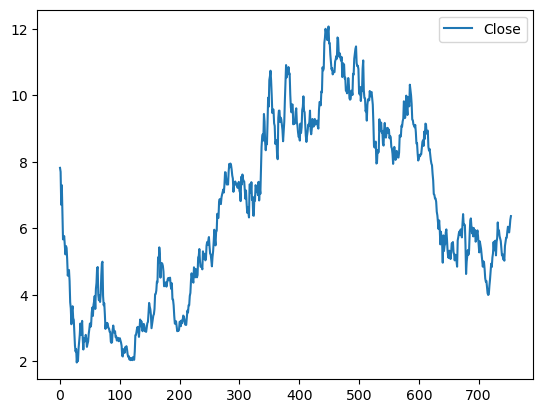

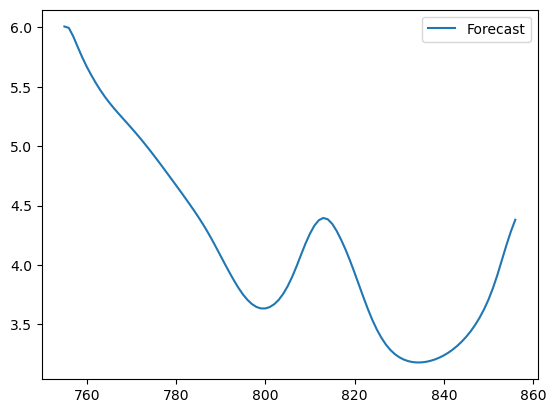

In [61]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

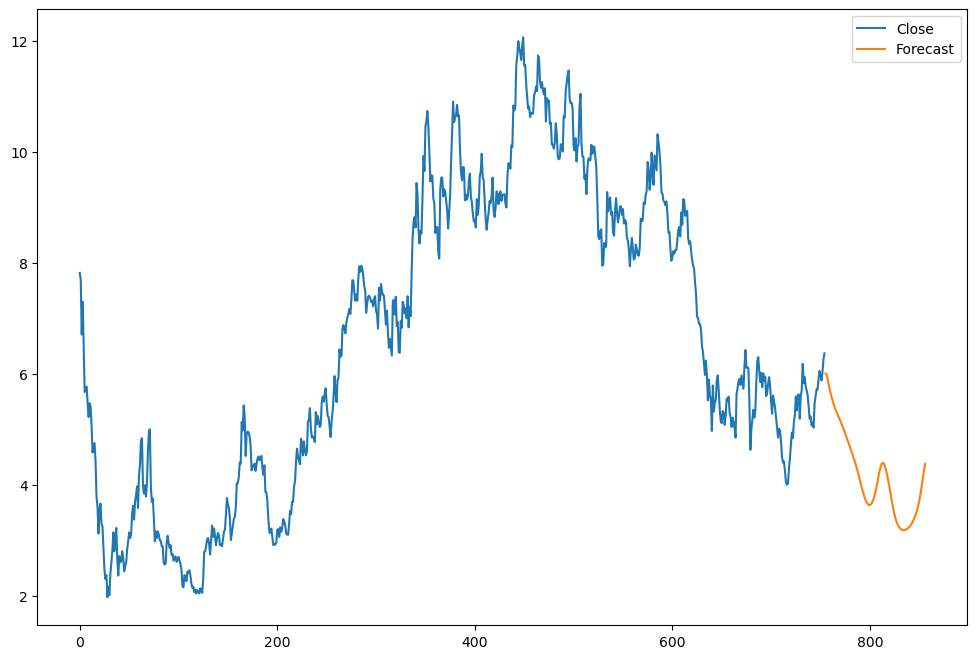

In [62]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [63]:
df_ALL_JAN_JUN_2012 = pd.read_csv('AAL (1).csv')

In [64]:
df_ALL_JAN_JUN_2012.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-23,6.43,6.49,6.20,6.26,5.901562,4500300
1,2012-01-24,6.21,6.53,6.11,6.41,6.042973,5945700
2,2012-01-25,7.00,7.94,6.89,7.52,7.089416,31771200
3,2012-01-26,7.78,8.27,7.65,7.85,7.400520,17160200
4,2012-01-27,7.80,8.27,7.76,8.18,7.711626,10372800


In [65]:
df_JAN_JUN_2012=df_ALL_JAN_JUN_2012.iloc[:,4:5]

In [66]:
df_JAN_JUN_2012

,Close
0,6.26
1,6.41
2,7.52
3,7.85
4,8.18
...,...
97,11.36
98,11.43
99,11.97
100,12.48


<AxesSubplot:>

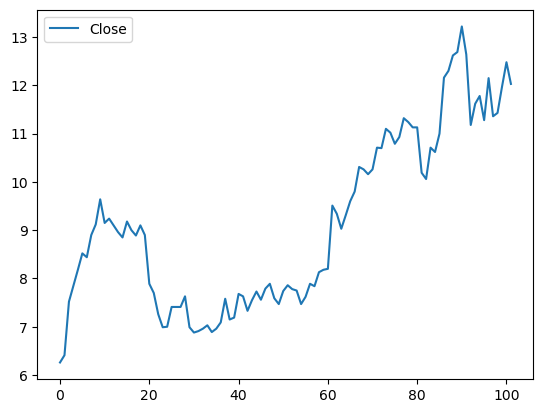

In [67]:
df_JAN_JUN_2012.plot()

In [68]:
forecast_df['Forecast'].values

array([6.00636243, 5.9941751 , 5.92173591, 5.8328511 , 5.74704555,
       5.66875756, 5.59883837, 5.53344627, 5.47350956, 5.41893613,
       5.36905534, 5.32302348, 5.27950711, 5.23730282, 5.19542993,
       5.15314556, 5.1099332 , 5.06548011, 5.0196418 , 4.97240473,
       4.92397176, 4.87457078, 4.82436159, 4.77350616, 4.72248276,
       4.67130284, 4.61968135, 4.56745936, 4.51445265, 4.46048138,
       4.40446553, 4.34571884, 4.28340827, 4.21718088, 4.14758121,
       4.07623677, 4.00518957, 3.93587991, 3.86942693, 3.80751142,
       3.75279817, 3.70744763, 3.67208936, 3.64779642, 3.63533774,
       3.63500784, 3.64681425, 3.67062257, 3.7071087 , 3.75724038,
       3.82128052, 3.89918834, 3.98884388, 4.08583517, 4.18003495,
       4.26382649, 4.33170367, 4.37734949, 4.39597438, 4.38456168,
       4.346231  , 4.28611654, 4.21149433, 4.1280807 , 4.03511036,
       3.93472075, 3.83098969, 3.72742162, 3.62784546, 3.53656571,
       3.45673659, 3.38865969, 3.33206999, 3.28650724, 3.25140

In [69]:
df_JAN_JUN_2012['Forecast'] = forecast_df['Forecast'].values

In [70]:
df_JAN_JUN_2012

,Close,Forecast
0,6.26,6.006362
1,6.41,5.994175
2,7.52,5.921736
3,7.85,5.832851
4,8.18,5.747046
...,...,...
97,11.36,3.918296
98,11.43,4.042501
99,11.97,4.166280
100,12.48,4.281202


<AxesSubplot:>

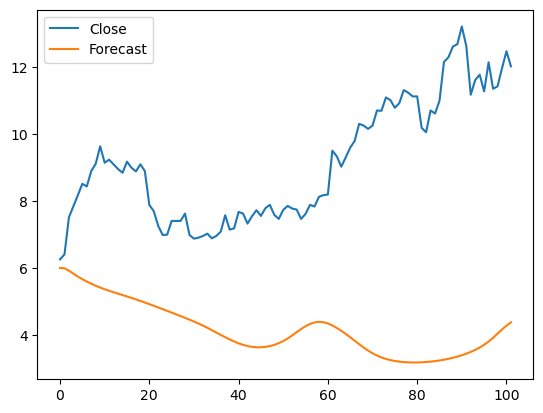

In [71]:
df_JAN_JUN_2012.plot()